# TASK-3
## EXPLORATORY DATA ANALYSIS (RETAIL)-
#### BY SIDDHARTH PAREEK

![alt text](M.png "Title")

In [28]:
!pip install jovian --upgrade --quiet

In [29]:
import jovian

In [30]:
# Execute this to save new versions of the notebook
jovian.commit(project="task-1")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddharth2000pareek/task-1" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siddharth2000pareek/task-1


'https://jovian.ai/siddharth2000pareek/task-1'

In [31]:
import pandas as pd

In [32]:
df=pd.read_csv('SampleSuperstore.csv')

In [33]:
df

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Category     Sales  Quantity  \
0           42420  South        Furniture    Bookcases  261.9600         2   
1           42420  South        Furniture       Chairs  731.9400         3   
2           90036   West  Office Supplies       Labels   14.6200         2   
3           33311  South        Furniture       Tables  957.5775         5   
4           33311  South  Office Supplies      Storage   22.3680         2   
...           ...    ...              ...          ...       ...       ...   
9989        33180  South        Furniture  Furnishings   25.2480         3   
9990        92627   West        Furniture  Furnishings   91.9600         2   
9991        92627   West       Technology       Phones  258.5760         2   
9992        92627   West  Office Supplies        Paper   29.6000         4   
9993        92683   West  Office Supplies   Appliances  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.00   13.3200  
9993      0.00   72.9480  

[9994 rows x 13 columns]

### LETS FIND OUT WEATHER THE DATA SET CONTAINS ANY NULL VALUES OR NOT-

In [34]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### * LOOKS LIKE THERE AIN'T ANY NULL VALUES IN THE DATA SET.

### LETS SEE ALL THE DEATILS USING THE describe() FUNCTION-

In [35]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

### LETS SEE ALL THE DIFFERENT DATA TYPES  IN THE DATA SET-

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### LETS SEE THE DIFFERENT COUNTRIES IN THE DATA SET-

In [37]:
df['Country'].unique()

array(['United States'], dtype=object)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [39]:
plt.bar(df.Category,df.Profit)

<BarContainer object of 9994 artists>

####  * FROM A BARGRAPH WE CAN SEE THAT TECHNOLOGY CATEGORY HAS THE HIGHEST PROFIT AND HIGHEST LOSS. LETS PLOT A BARPLOT BETWEEN SUB-CATEGORY AND PROFIT TO FIND OUT THE OBJECT WITH MOST PROFIT.

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

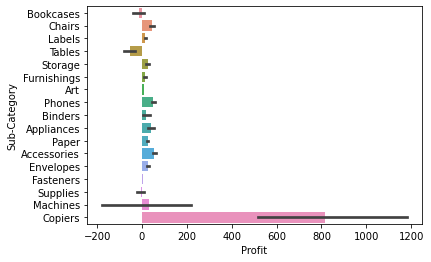

In [40]:
sns.barplot(x='Profit',y='Sub-Category',data=df)

#### * WE CAN SEE THAT COPIERS HAVE THE MOST AMOUNT OF PROFIT, BUT IF WE CAN GET TO KNOW THE DEMAND IN EACH REGION THEN WE WILL BE ABLE TO IMPROVE THE DATASET.

In [41]:
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [42]:
south_df=df.Region=='South'
south_df=pd.DataFrame({'south':south_df})

In [43]:
sns.scatterplot(x=df.Profit,y=df['Sub-Category'],hue=df.Region=='South')

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

#### * WE CAN SEE THAT IN SOUTH REGION WE WILL INCUR LOSS OR NO PROFIT IF WE SELL MACHINES,ASSCESSORIES,TABLES.
#### * BUT IT HAS A PROFIT MARKET FOR COPIERS,BLINDERS ETC.

In [44]:
r=df.Region.tolist()
k=0
st_south=[]
for i in r:
    if(i=='South'):
        st_south.append(df.State[k])
        k=k+1
    
    

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

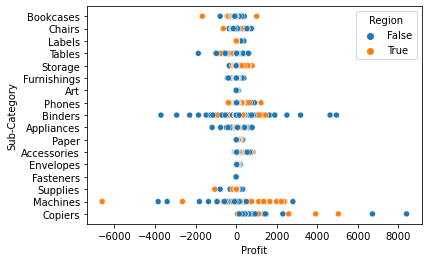

In [45]:
sns.scatterplot(x=df.Profit,y=df['Sub-Category'],hue=df.Region=='East')

#### * EAST REGION HAS A VERY GOOD PROFIT RANGE FOR COPIERS,MACHINES ETC. BINDERS HAVE PROFIT AND LOSS AND SAME.

In [46]:
sns.scatterplot(x=df.Profit,y=df['Sub-Category'],hue=df.Region=='West')


<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

#### * IN THE WEST REGION NOT MANY THINGS HAVE LOSES AND COPIERS IS STILL THE BESTSELLER HERE.
#### * BINDERS ARE AT THE MIDDLE.

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

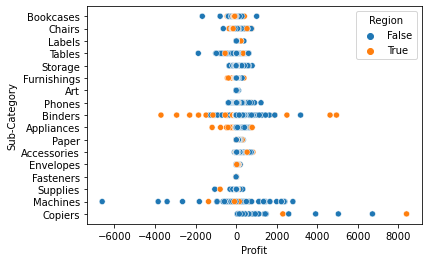

In [47]:
sns.scatterplot(x=df.Profit,y=df['Sub-Category'],hue=df.Region=='Central')

#### * CENTRAL REGION HAVE MORE LOSS THAN PROFIT FOR BINDERS.

In [48]:
st_south=pd.DataFrame({'State':st_south})

In [49]:
len(st_south['State'].unique())

41

In [50]:
len(df['State'].unique())

49

In [51]:
sns.barplot(x=df['Quantity'],y=df['Sub-Category'],data=df)

<AxesSubplot:xlabel='Quantity', ylabel='Sub-Category'>

#### * MOST OF THE ITEMS ARE SOLD IN THE QUANTITY OF 3 TO 4.

In [52]:
sns.barplot(x=df.Discount,y=df.Profit,data=df)

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

#### * WE CAN SEE THAT ITEMS WITH MORE DISCOUNT HAVE NOT YIELD PROFIT.

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

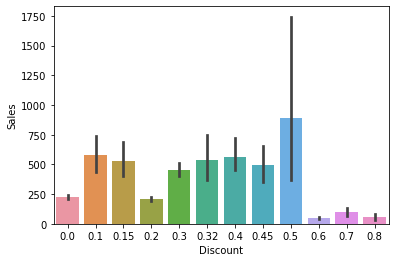

In [53]:
sns.barplot(x=df.Discount,y=df.Sales,data=df)

#### * SALES ARE VERY LOW FOR PRODUCTS WITH HIGH DISCOUNT AND PROFIT IS ALSO NOT THERE FOR THESE PRODUCTS. THAT MEANS THERE IS NO REASON TO GIVE DISCOUNT ON THESE PRODUCTS AS THEY YIELD NO PROFIT WITH VERY LOW SALES.

### THE DIFFERENT SEGMENTS OF CONSUMER ARE-

In [54]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [56]:
!pip install plotly matplotlib seaborn --quiet
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### PLOTTING A SCATTERPLOT BETWEEN SUB-CATEGORY AND SALES WITH SEGMENT AS HUE. 

<AxesSubplot:xlabel='Sales', ylabel='Sub-Category'>

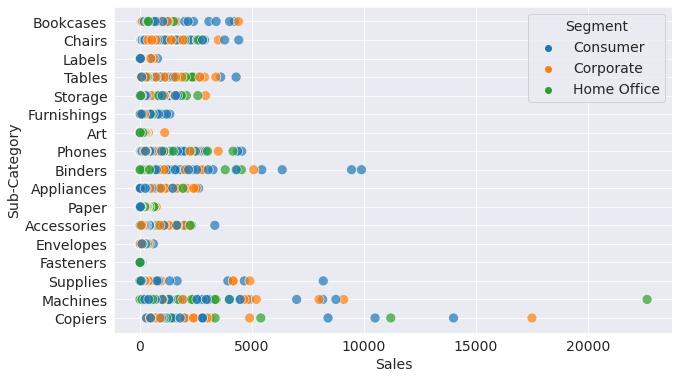

In [64]:
#px.histogram(df, x='Sales', color='Sub-Category', title='Segment')
sns.scatterplot(x=df.Sales,y=df['Sub-Category'],hue=df.Segment,s=100,alpha=0.7)

#### * CONSUMER SEGMENT HAS FAIRLY HIGH DEMAND FOR BINDERS,SUPPLIES,MACHINES,COPIERS.
#### * HOME OFFICE SEGMENT HAS A GOOD MARKET FOR MACHINES,COPIERS ETC.
#### * FASTENERS,ART,PAPER,LABELS,ENVELOPES ARE NOT BROUGHT OFTEN BY ALL THE THREE SEGMENTS.
#### * REST OF THE ITEMS ARE ALL IN THE SAME LEVEL OF DEMAND IRRESPECTIVE OF THE SEGMENT.

## WHAT WE CAN DRAW FROM THE ABOVE DATA ANALYSIS-

#### * WE SAW THE DEMANDS IN VARIOUS REGIONS. LIKE SOUTH REGION HAD PROFIT MACHINES,ASSCESSORIES,TABLES BUT INCURS A LOSS ON BINDERS AND MACHINES.SO THE SUPLLY OF PRODUCTS YIELDING LOSS CAN BE REDUCED . SIMILARLY FOR OTHER REGIONS. 
#### * PRODUCTS WITH HUGE DISCOUNTS DO NOT YIELD HIGH PROFITS AND HIGH SALES BUT ON THE OTHER HAND A DISCOUNT OF 10% TO 20% DOES THE JOB.
#### * CONSUMER SEGMENT HAS FAIRLY HIGH DEMAND FOR BINDERS,SUPPLIES,MACHINES,COPIERS.
#### * HOME OFFICE SEGMENT HAS A GOOD MARKET FOR MACHINES,COPIERS ETC.
#### * FASTENERS,ART,PAPER,LABELS,ENVELOPES ARE NOT BROUGHT OFTEN BY ALL THE THREE SEGMENTS.
#### * REST OF THE ITEMS ARE ALL IN THE SAME LEVEL OF DEMAND IRRESPECTIVE OF THE SEGMENT.

# THANK YOU :)